In [1]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
list_dir = '../DanielCorley/user-site-export'

In [3]:
# distance
files = [x for x in os.listdir(list_dir) if x[:2] == 'di']
print(files[0], len(files))

# iterate over the files and append to one dataframe
df = pd.DataFrame()
for i,file in enumerate(files):
    print(i, end=', ' if i != files[-1] else '')
    df = df.append(pd.read_json(f'user-site-export/{file}'))

distance-2016-04-19.json 41
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 

In [4]:
df.head()

,dateTime,value
0,2016-04-21 05:00:00,0
1,2016-04-21 05:01:00,0
2,2016-04-21 05:02:00,0
3,2016-04-21 05:03:00,0
4,2016-04-21 05:04:00,0


In [5]:
df.set_index('dateTime', inplace=True)

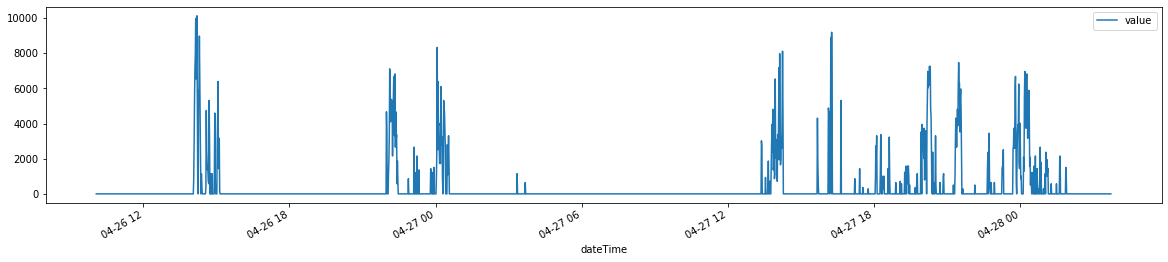

In [6]:
df[7500:10000].plot(figsize=(20,4));

In [11]:
df.sort_values('value', ascending=True)

,value
dateTime,
2018-04-09,0.000000
2018-01-26,0.000000
2018-01-27,0.000000
2018-01-28,0.000000
2018-01-29,0.000000
...,...
2017-07-29,2390.659537
2019-07-27,2391.348837
2019-07-06,2543.779070


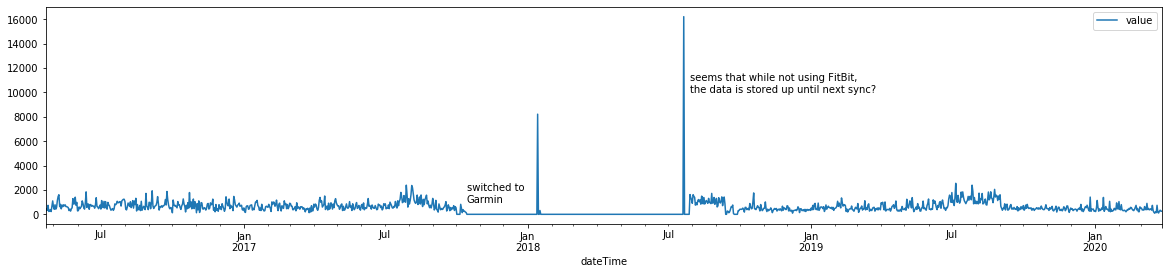

In [16]:
df = df.resample('d').mean().fillna(0)
df.plot(figsize=(20,4))
plt.text('2017-10-15', 1000, 'switched to\nGarmin')
plt.text('2018-07-29', 10000, 'seems that while not using FitBit,\nthe data is stored up until next sync?');

In [86]:
# sleep
files = [x for x in os.listdir(list_dir) if x[:3] == 'sle']
print(f'file format: {files[0]}')
print(f'number of files: {len(files)}')

sleep_df = pd.DataFrame()
for file in files:
    sleep_df = sleep_df.append(pd.read_json(f'user-site-export/{file}'))

file format: sleep-2016-04-19.json
number of files: 39


In [87]:
sleep_df.head(2)

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
0,11675995227,2016-05-19,2016-05-18T23:16:00.000,2016-05-19T08:37:30.000,33660000,0,529,32,0,561,94,classic,0,"{'summary': {'restless': {'count': 21, 'minute...",True
1,11675995226,2016-05-18,2016-05-17T23:42:00.000,2016-05-18T08:40:30.000,32280000,0,516,22,0,538,96,classic,0,"{'summary': {'restless': {'count': 14, 'minute...",True


In [89]:
sleep_df.startTime = pd.to_datetime(sleep_df.startTime)
sleep_df.set_index('startTime', inplace=True)

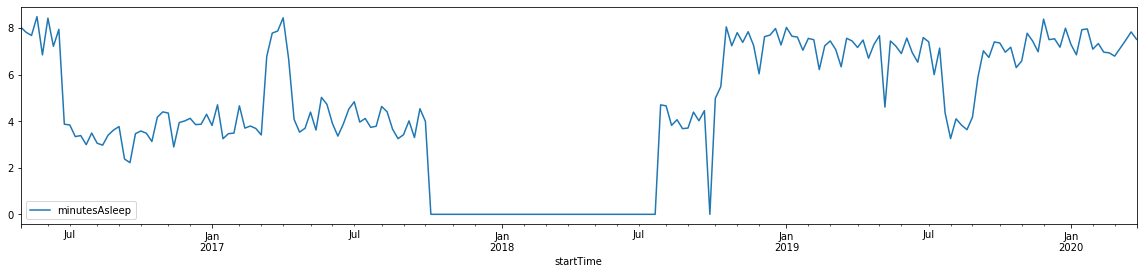

In [103]:
(sleep_df.resample('w').agg({'minutesAsleep':'mean'}).fillna(0)/60).plot(figsize=(20,4));

In [106]:
sleep_df.duration

startTime
2016-05-18 23:16:00    33660000
2016-05-17 23:42:00    32280000
2016-05-16 23:15:30    32220000
2016-05-15 22:39:30    32220000
2016-05-15 01:30:30    25200000
                         ...   
2020-03-03 01:08:00    22500000
2020-03-01 23:39:00    28320000
2020-02-29 22:42:30    37680000
2020-02-29 00:51:00    34080000
2020-02-28 01:11:00    23940000
Name: duration, Length: 1120, dtype: int64

In [109]:
sleep_df.resample('w').agg({'minutesAsleep':'mean'})

,minutesAsleep
startTime,
2016-05-01,482.400000
2016-05-08,469.000000
2016-05-15,460.714286
2016-05-22,509.166667
2016-05-29,410.666667
...,...
2020-03-01,407.444444
2020-03-08,427.666667
2020-03-15,448.125000


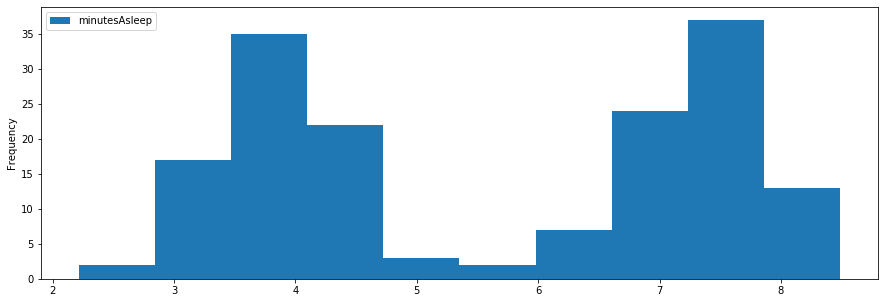

In [112]:
(sleep_df.resample('w').agg({'minutesAsleep':'mean'})/60).plot(kind='hist', figsize=(15,5));